In [1]:
import random
import math

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
def uniform_sample_2d(c: tuple, r: float, n: int, label: str):
    data = []
    
    for i in range(n):
        angle = random.uniform(0, 2*math.pi)
        dist = random.uniform(0, r)

        data.append([c[0]+dist*math.cos(angle), c[1]+dist*math.sin(angle)])
    
    return {
        'features': np.array(data),
        'label': label
    }

In [3]:
class NNClassifier:
    def __init__(self) -> None:
        self.w: np.ndarray = np.random.uniform(-1, 1, 2)
        self.b = 0


    def predict(self, x:np.ndarray):
        return np.dot(self.w, x)+self.b


    def train(self, xTrain: np.ndarray, yTrain: np.ndarray, lr, batch_size, max_iter):
        n = xTrain.shape[0]

        dw = np.zeros(self.w.shape)
        db = 0

        for k in range(max_iter):
            idxs = np.random.choice(a=np.arange(n), size=batch_size, replace=False)

            for i in idxs:
                dwi, dbi = self.grads(xTrain[i], yTrain[i])
                dw += dwi
                db += dbi

            self.w -= lr*dw
            self.b -= lr*db

            dw *= 0
            db = 0
            

    def grads(self, x: np.ndarray, y: np.ndarray):        
        u = np.dot(self.w, x)+self.b

        dEdu = 2*(u-y)
        dEdw = dEdu*x
        dEdb = dEdu

        return dEdw, dEdb
        
    
    def loss(self, x: np.ndarray, y: np.ndarray):
        n = x.shape[0]
        u = np.array([self.predict(xi) for xi in x])
        
        return 1/n*np.sum(np.square(u-y))

In [4]:
sample1 = uniform_sample_2d((-1, -1), 2, 150, 'A')
sample2 = uniform_sample_2d((1, 1), 2, 150, 'B')

data = [sample1, sample2]

In [5]:
df = pd.DataFrame(columns=['x1', 'x2', 'label'])

for sample in data:
    for feature in sample['features']:
        df.loc[len(df.index)] = [*feature, sample['label']]

label_mapping = {
    'A': -1,
    'B': 1
}

df['y'] = df['label'].map(lambda x: label_mapping[x])

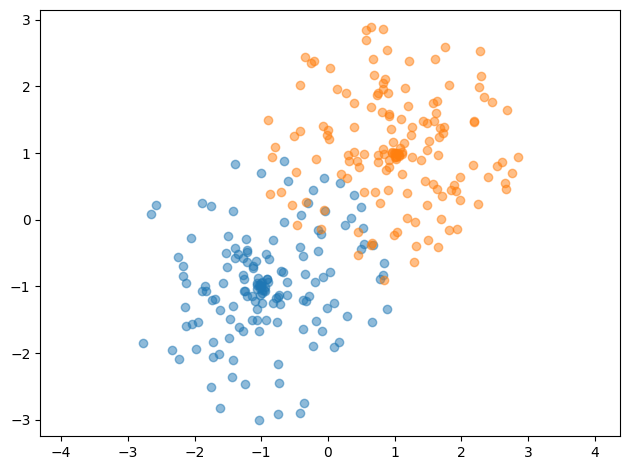

In [6]:
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['x1'], df[df['label'] == label]['x2'], alpha=0.5)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [7]:
test_size = 0.8

p = np.random.permutation(df.index.size)
idx_train = p[:int(p.size*test_size)]
idx_test = p[int(p.size*test_size):]

xTrain = np.array(df.iloc[idx_train][['x1', 'x2']])
yTrain = np.array(df.iloc[idx_train]['y'])

xTest = np.array(df.iloc[idx_test][['x1', 'x2']])
yTest = np.array(df.iloc[idx_test]['y'])

In [8]:
lr = 1e-2
batch_size = 10
max_iter = 1000

model = NNClassifier()

print('untrained loss: ', model.loss(xTest, yTest))

model.train(xTrain, yTrain, lr, batch_size, max_iter)

print('trained loss: ', model.loss(xTest, yTest))

untrained loss:  2.4954629435496893
trained loss:  0.2472076433367031


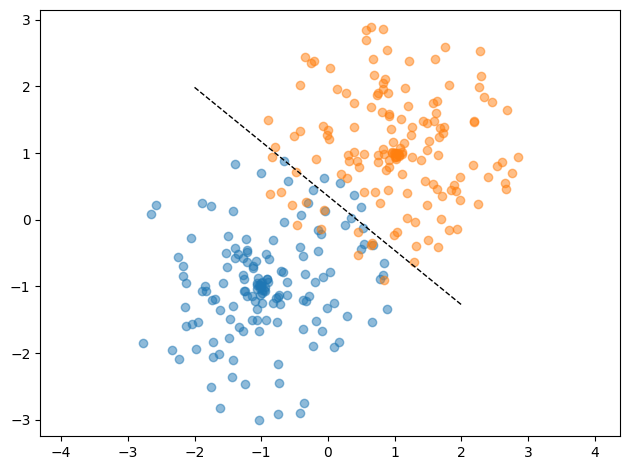

In [9]:
w1, w2, b = model.w[0], model.w[1], model.b

x = np.linspace(-2, 2, 100)
y = -w1/w2*x-b/w2

for label in df['label'].unique():
    features = df[df['label'] == label]
    x1, x2 = features['x1'], features['x2']
    plt.scatter(x1, x2, alpha=0.5)

plt.plot(x, y, c='black', lw=1, ls='--')

plt.axis('equal')
plt.tight_layout()
plt.show()